### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja, loja2, loja3, loja4]

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [17]:
faturamento_lojas = []
for i in range(len(lojas)):
    faturamento_lojas.append([f"Loja {i+1}", sum(lojas[i]["Preço"])])
print(faturamento_lojas)

[['Loja 1', 1534509.12], ['Loja 2', 1488459.06], ['Loja 3', 1464025.03], ['Loja 4', 1384497.58]]


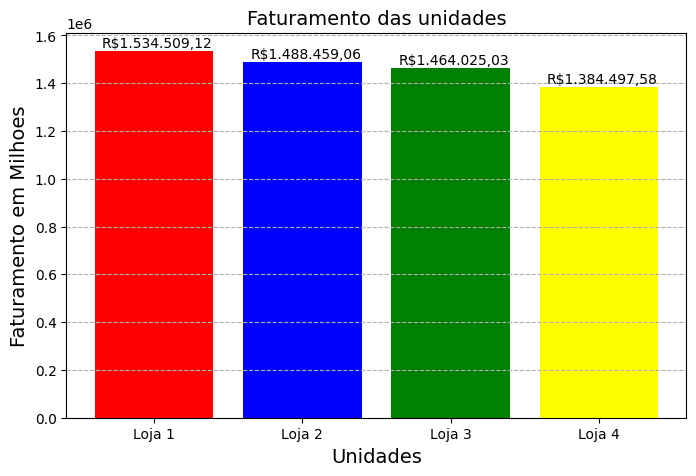

In [18]:

precos = [faturamento_lojas[i][1] for i in range(len(faturamento_lojas))]
unidades = [faturamento_lojas[i][0] for i in range(len(faturamento_lojas))]

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(unidades, precos, color=["red", "blue", "green", "yellow"])
ax.set_title("Faturamento das unidades", fontsize=14)
ax.set_ylabel("Faturamento em Milhoes", fontsize=14)
ax.set_xlabel("Unidades", fontsize=14)
ax.grid(axis="y", ls="--")
for idx, val in enumerate(precos):
    txt = f"R${val:,}"
    txt = str(txt.replace(",","."))
    txt = txt[::-1]
    txt = txt.replace(".", ",", 1)
    txt = txt[::-1]
    y_coord = (val + 15000)
    x_coord = (idx - 0.35)
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=10)
plt.show()

# 2. Vendas por Categoria


In [19]:
vendas_categoria = {}

for i in range(len(lojas)):
    categorias = lojas[i].groupby(["Categoria do Produto"]).size()
    vendas_categoria[f"Loja {i+1}"] = [[categoria, vendas] for categoria, vendas in categorias.items()]
print(vendas_categoria)

{'Loja 1': [['brinquedos', 324], ['eletrodomesticos', 312], ['eletronicos', 448], ['esporte e lazer', 284], ['instrumentos musicais', 182], ['livros', 173], ['moveis', 465], ['utilidades domesticas', 171]], 'Loja 2': [['brinquedos', 313], ['eletrodomesticos', 305], ['eletronicos', 422], ['esporte e lazer', 275], ['instrumentos musicais', 224], ['livros', 197], ['moveis', 442], ['utilidades domesticas', 181]], 'Loja 3': [['brinquedos', 315], ['eletrodomesticos', 278], ['eletronicos', 451], ['esporte e lazer', 277], ['instrumentos musicais', 177], ['livros', 185], ['moveis', 499], ['utilidades domesticas', 177]], 'Loja 4': [['brinquedos', 338], ['eletrodomesticos', 254], ['eletronicos', 451], ['esporte e lazer', 277], ['instrumentos musicais', 170], ['livros', 187], ['moveis', 480], ['utilidades domesticas', 201]]}


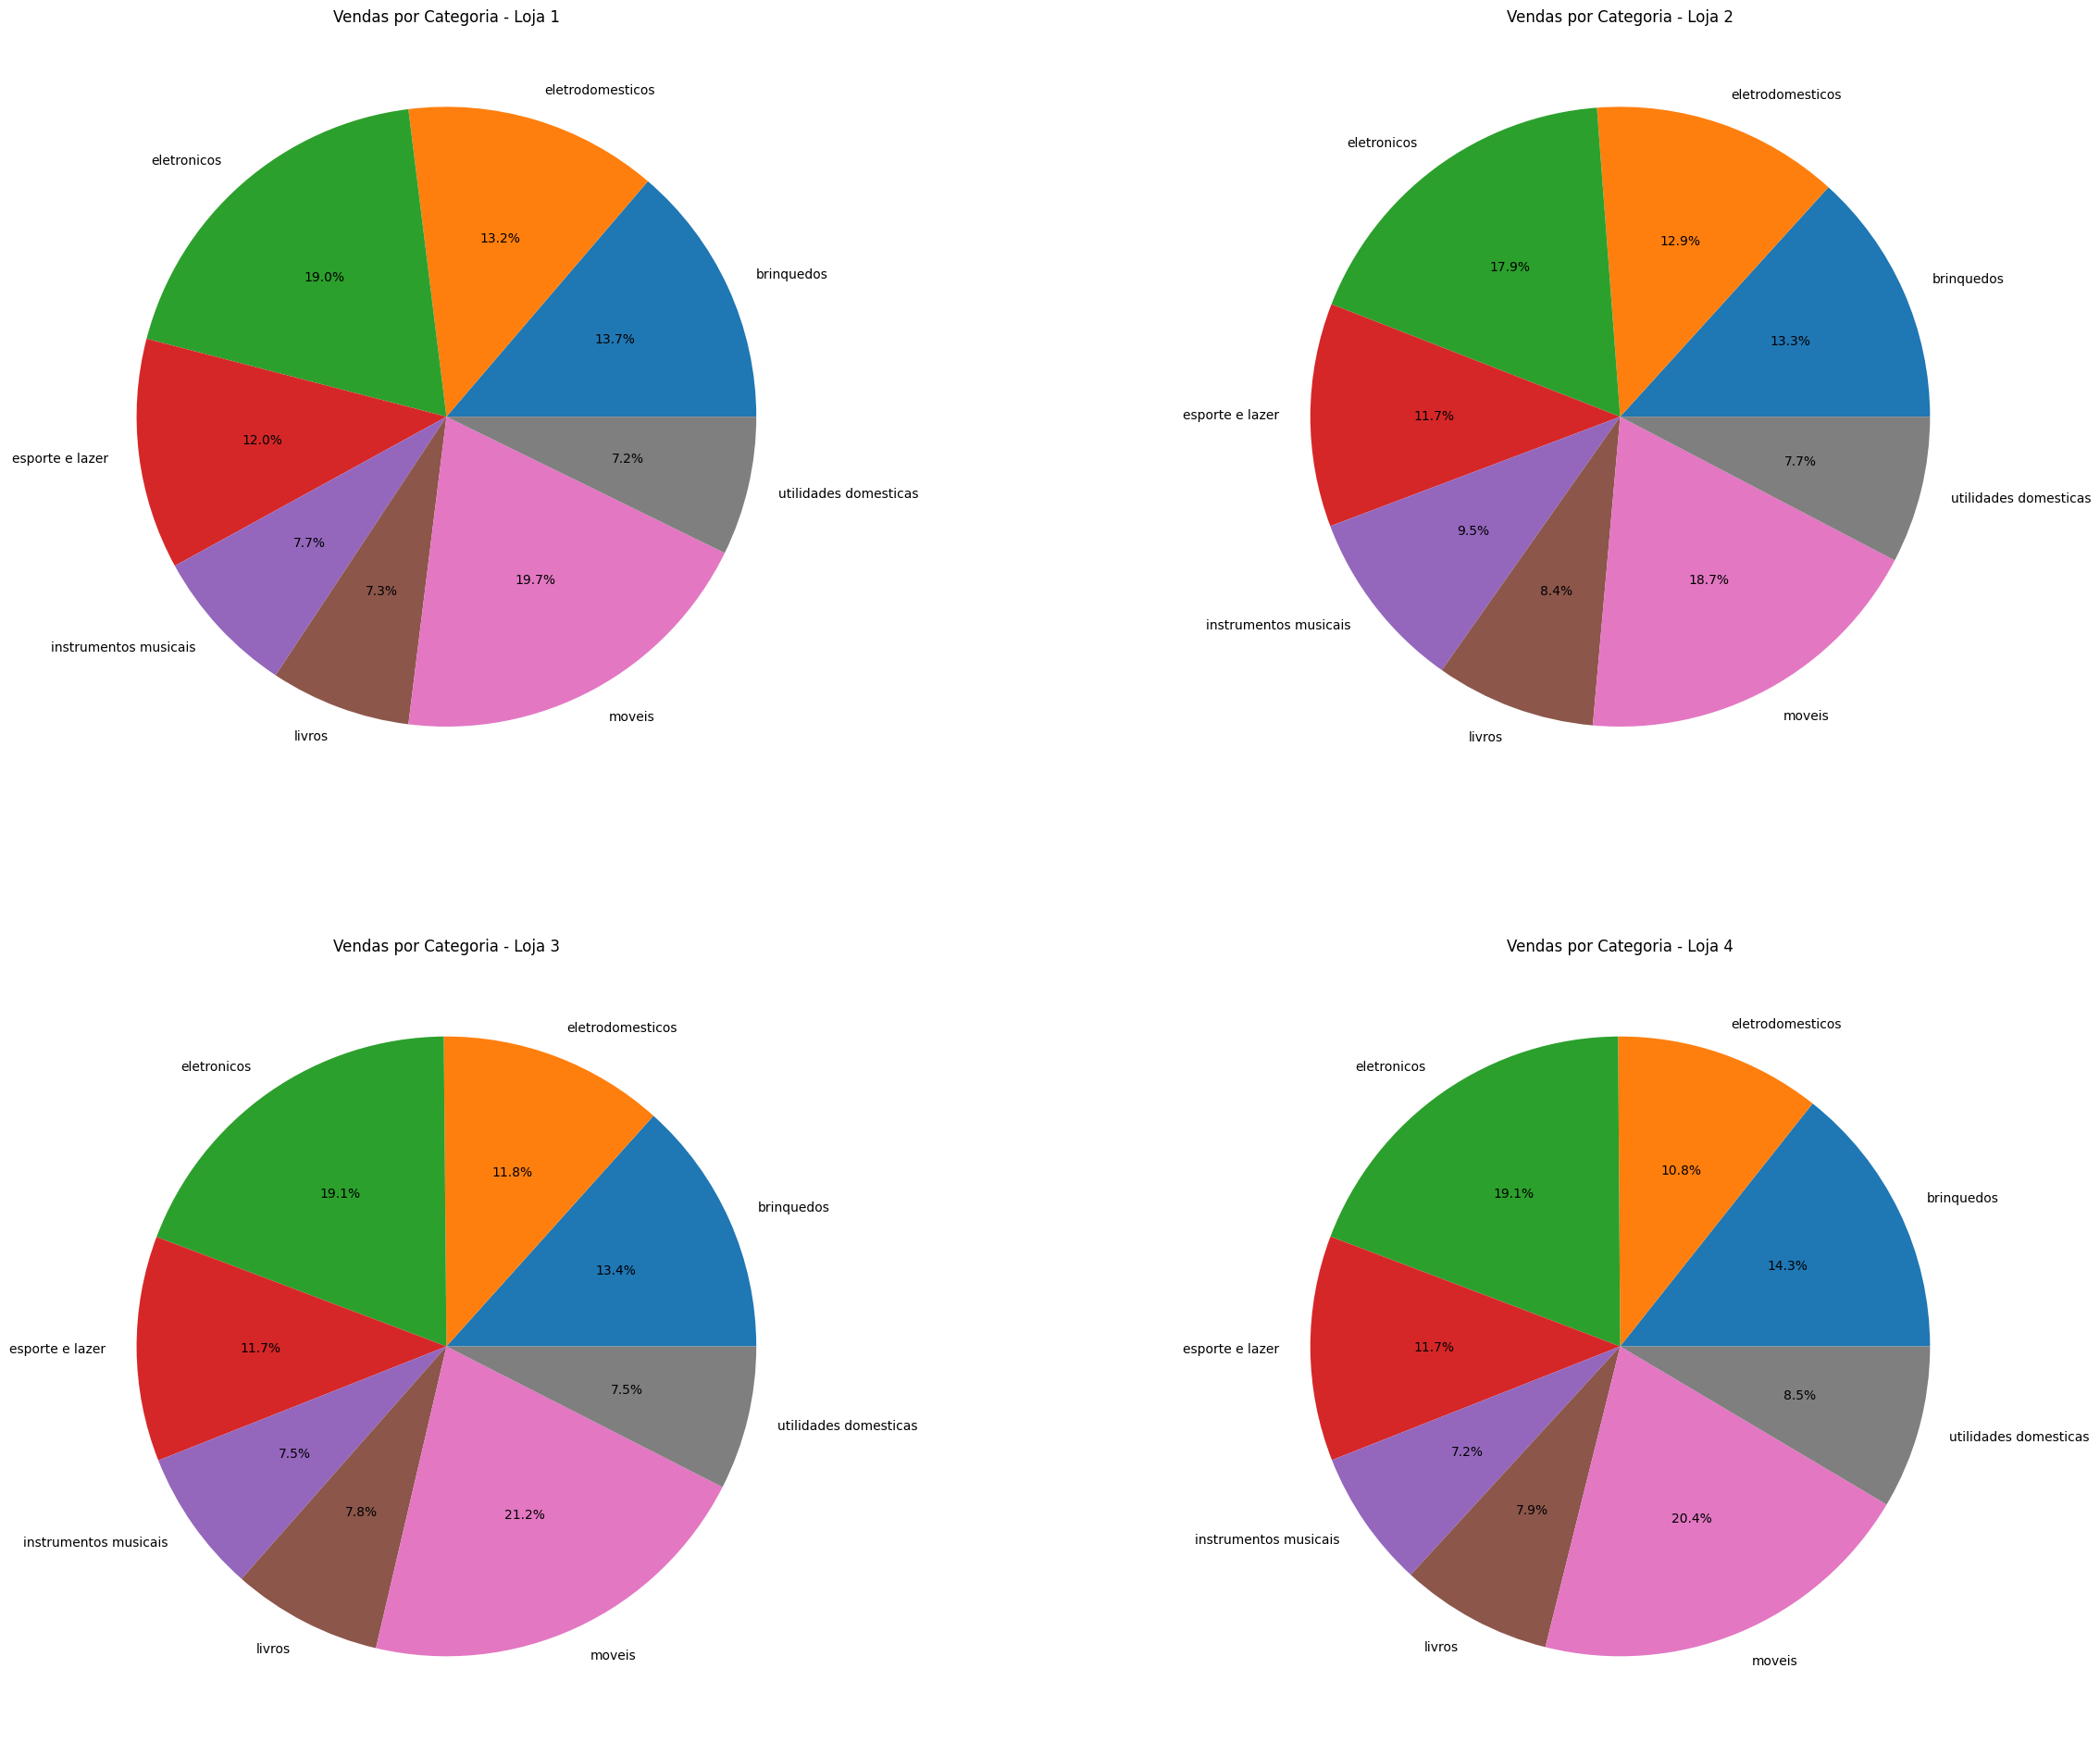

In [64]:
lista_categorias = [produto for produto, qtde in categorias.items()]
lista_vendas = []
for chave in vendas_categoria:
    lista = []
    for i in range(len(vendas_categoria[chave])):
        lista.append(vendas_categoria[chave][i][1])
    lista_vendas.append(lista)

plt.figure("Vendas por Categoria (%)", figsize=(30, 50))
for i in range(len(lista_vendas)):
    plt.subplot(4,2,i+1)
    plt.title(f"Vendas por Categoria - Loja {i+1}")
    plt.pie(lista_vendas[i], labels=lista_categorias, autopct="%1.1f%%")



# 3. Média de Avaliação das Lojas

In [21]:
media_avaliacoes = {}
for i in range(len(lojas)):
    media_avaliacoes[f"Loja {i+1}"] = round(sum(lojas[i]["Avaliação da compra"])/len(lojas[i]["Avaliação da compra"]), 2)
print(media_avaliacoes)

{'Loja 1': 3.98, 'Loja 2': 4.04, 'Loja 3': 4.05, 'Loja 4': 4.0}


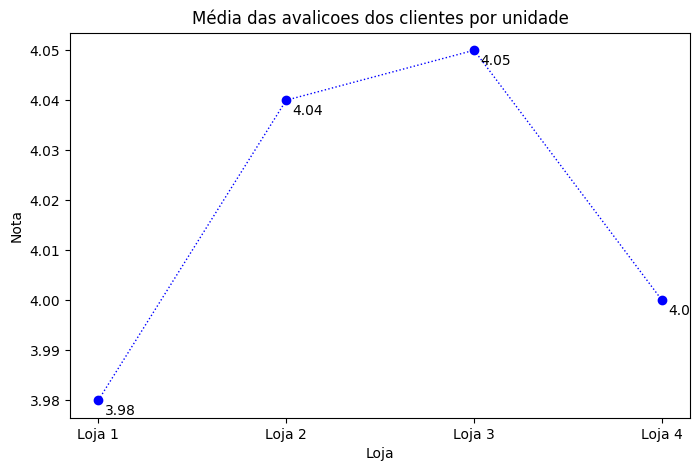

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(unidades, media_avaliacoes.values(), color="blue", marker="o", label="média", ls=":", lw=1)
ax.set_xlabel("Loja")
ax.set_ylabel("Nota")
ax.set_title("Média das avalicoes dos clientes por unidade")
for idx, nota in enumerate(media_avaliacoes.values()):
    txt = f"{nota}"
    y_cd = nota - 0.003
    x_cd = idx + 0.035
    ax.text(x=x_cd, y=y_cd, s=txt, fontsize=10)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [23]:
maiores_e_menores = {}
for i in range(len(lojas)):
    vendas = lojas[i]["Produto"].value_counts()
    vendas = [(prod, venda) for prod, venda in vendas.items()]
    for prod in range(len(vendas)):
        maiores_e_menores[f"Loja {i+1}"] = {"Produtos Mais Vendidos":vendas[:5], "Produtos Menos Vendidos":vendas[len(vendas)-5:]}
print(maiores_e_menores)

{'Loja 1': {'Produtos Mais Vendidos': [('Micro-ondas', 60), ('TV Led UHD 4K', 60), ('Guarda roupas', 60), ('Secadora de roupas', 58), ('Cômoda', 56)], 'Produtos Menos Vendidos': [('Ciência de dados com python', 39), ('Pandeiro', 36), ('Panela de pressão', 35), ('Headset', 33), ('Celular ABXY', 33)]}, 'Loja 2': {'Produtos Mais Vendidos': [('Iniciando em programação', 65), ('Micro-ondas', 62), ('Bateria', 61), ('Violão', 58), ('Pandeiro', 58)], 'Produtos Menos Vendidos': [('Fone de ouvido', 37), ('Poltrona', 35), ('Mesa de jantar', 34), ('Impressora', 34), ('Jogo de tabuleiro', 32)]}, 'Loja 3': {'Produtos Mais Vendidos': [('Kit banquetas', 57), ('Mesa de jantar', 56), ('Cama king', 56), ('Jogo de panelas', 55), ('Cômoda', 55)], 'Produtos Menos Vendidos': [('Guitarra', 38), ('Jogo de copos', 36), ('Mochila', 36), ('Micro-ondas', 36), ('Blocos de montar', 35)]}, 'Loja 4': {'Produtos Mais Vendidos': [('Cama box', 62), ('Faqueiro', 59), ('Dashboards com Power BI', 56), ('Cama king', 56), ('C

# 5. Frete Médio por Loja


In [24]:
media_fretes = {}
for i in range(len(lojas)):
    media_fretes[f"Loja {i+1}"] = round(sum(lojas[i]["Frete"])/len(lojas[i]["Frete"]), 2)
print(media_fretes)

{'Loja 1': 34.69, 'Loja 2': 33.62, 'Loja 3': 33.07, 'Loja 4': 31.28}


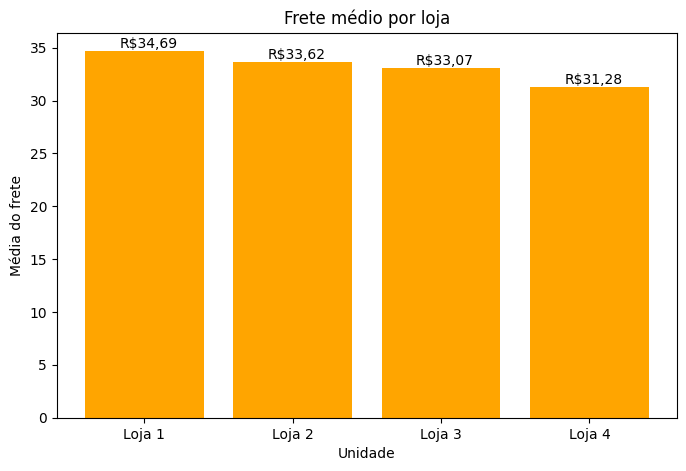

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(unidades, media_fretes.values(), color="orange")
ax.set_ylabel("Média do frete")
ax.set_xlabel("Unidade")
ax.set_title("Frete médio por loja")
for i, frete in enumerate(media_fretes.values()):
    txt = f"R${frete}"
    txt = str(txt.replace(".", ","))
    y_cd = frete + 0.3
    x_cd = i - 0.17
    ax.text(x=x_cd, y=y_cd, s=txt, fontsize=10)
plt.show()

# 6. Lucro (Faturamento - Frete)

In [ ]:
gastos_frete = []
lucro = []
for i in range(len(lojas)):
    gastos_frete.append([f"Loja {i+1}", sum(lojas[i]["Frete"])])
    lucro.append(faturamento_lojas[i][1] - gastos_frete[i][1])
print(gastos_frete)
print(lucro)

[['Loja 1', 81837.9677956916], ['Loja 2', 79314.1580126449], ['Loja 3', 78022.661222643], ['Loja 4', 73755.8751189828]]
[1452671.1522043084, 1409144.9019873552, 1386002.368777357, 1310741.7048810173]


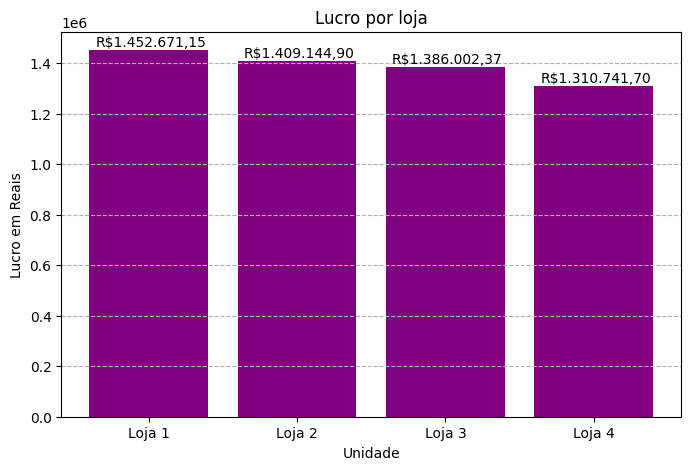

In [58]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(unidades, lucro, color="purple")
ax.set_xlabel("Unidade")
ax.set_ylabel("Lucro em Reais")
ax.set_title("Lucro por loja")
ax.grid(axis="y", linestyle="--")
for i, val in enumerate(lucro):
    txt = f"R${val:,.2f}"
    txt = txt.replace(",", ".")
    txt = str(txt[::-1])
    txt = txt.replace(".",",", 1)
    txt = txt[::-1]
    y_cd = (val + 15000)
    x_cd = (i - 0.36)
    ax.text(x=x_cd, y=y_cd, s=txt, fontsize=10)

## Relatório



Após análise com base nos dados e informações oferecidas, fica a sugestão ao Sr. João que realize a venda da **Loja 4**, baseado nos seguintes motivos:

**Menor Faturamento**: Com faturamento de R$ 1.384.497,58 a loja de número 4 é que menos fatura. Embora Faturamento e Lucro envolvam diversos aspectos e sejam distintos entre si, veremos o impacto disso no próximo ponto;

**Menor Lucro**: Apesar de possuir a menor média de Frete, sendo de R$ 31,28, ainda assim quando realizamos abatemos o valor do frete do montante bruto de faturamento, a Loja 4 tem o menor Lucro dentre as 4 lojas. *Embora o lucro líquido envolva diversos outros aspectos, realizei o cálculo com os dados fornecidos.*

Com relação às avaliações dos clientes e vendas por categoria, todas as 4 lojas compartilham muitas semelhanças, destacando-se principalmente na Lojas 4 as seguintes categorias:

Móveis, Eletônicos e Brinquedos.